# Exploration of Cancer Surgeries Data

This notebook examines the average volume of cancer surgeries performed in Los Angeles County from 2013 to 2022, focusing on identifying the most and least common procedures for various types of cancer, including breast, lung, and colon cancer. The dataset covers both inpatient and outpatient settings, but it's important to note that a change in coding standards in 2015 may affect the consistency of the data. Using density plots, I will visualize the three most common and the three least common surgeries based on average volume to uncover patterns in their distribution within the county. My background in healthcare has sparked my interest in this dataset, and this analysis aims to provide insights into the distribution of surgical focus across different cancer types.

# Kernel Density Estimate (KDE) Plot for Cancer Surgery Analysis

The kernel density estimate (KDE) plot is a tool for visualizing the distribution of a continuous variable, creating a smooth curve that represents data density. Unlike discrete plots, the KDE plot estimates the probability density function, making it easier to observe patterns in the data. Adjustments to bandwidth and kernel function allow for customization of the curve's smoothness and shape. In this analysis, I will use KDE plots to visualize the average number of cancer surgery cases by type, providing insights into the distribution of surgeries in Los Angeles County from 2013 to 2022.

# Creating Density Plots with Seaborn’s kdeplot

Seaborn is a Python data visualization library built on top of Matplotlib, known for its ability to produce aesthetically pleasing and informative statistical graphics with minimal code. One of its powerful functions, seaborn.kdeplot, is especially suited for creating kernel density estimate (KDE) plots, which display the distribution of a continuous variable in a smooth, interpretable way. The kdeplot function allows for easy customization of bandwidth, fill, and color, making it ideal for highlighting density patterns and comparisons across categories. In this analysis, I’ll use seaborn.kdeplot to visualize the average number of cancer surgeries by type, providing a clear view of the distribution of surgeries across Los Angeles County.

# Import Libraries

In [1]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection and Cleaning
The data for this analysis was sourced from the California Department of Health Care Access and Information (HCAI), which provides detailed public health data for various healthcare metrics across the state. This dataset was accessed through the California Health and Human Services open data portal at https://data.chhs.ca.gov/. This resource offers comprehensive health data, enabling a closer examination of healthcare trends, including cancer surgery volumes in California hospitals.

In [ ]:
# Define the URL where the dataset is located
# URL = 'https://data.chhs.ca.gov/dataset/dace89fc-69ec-4fe8-a8f4-ddfbdb053020/resource/f3d8578f-a9bf-4f6a-a224-7e5b522cbd76/download/ca-oshpd-cancer-surgeries-gachospitals-20132022_odp1c.csv'

# Download the dataset from the specified URL and save it as 'surgeries.csv' locally
# urlretrieve(URL, 'surgeries.csv')

# Read the downloaded CSV file into a DataFrame using pandas
# Specify encoding to handle any special characters in the data
df = pd.read_csv('data/surgeries.csv', encoding='ISO-8859-1')

# Display the first few rows of the DataFrame to check the loaded data
df.head()

,Year,County,hospital,Surgery,# of Cases,LONGITUDE,LATITUDE
0,2016,NaN,Statewide,Brain,3162,NaN,NaN
1,2015,NaN,Statewide,Brain,2111,NaN,NaN
2,2013,NaN,Statewide,Colon,7128,NaN,NaN
3,2015,NaN,Statewide,Bladder,677,NaN,NaN
4,2016,NaN,Statewide,Prostate,6508,NaN,NaN


### Filtering and Cleaning Data for Los Angeles County

In [3]:
# Filter the DataFrame to include only rows where the 'County' column is 'Los Angeles'
los_angeles_df = df[df['County'] == 'Los Angeles']

# Drop unnecessary columns that won't be used in the analysis
# Specifically, remove 'LONGITUDE', 'LATITUDE', and 'hospital' columns
los_angeles_df.drop(columns=['LONGITUDE', 'LATITUDE', 'hospital'], inplace=True)

# Reset the index of the filtered DataFrame for a clean, continuous index
los_angeles_df = los_angeles_df.reset_index(drop=True)

### Identifying the Most and Least Common Cancer Surgeries by Volume

In [4]:
# Group the Los Angeles data by 'Surgery' type and calculate the total number of cases for each type
surgery_totals = los_angeles_df.groupby('Surgery')['# of Cases'].sum()

# Identify the 3 most common surgeries by total volume of cases
most_common_surgeries = surgery_totals.nlargest(3).index

# Identify the 3 least common surgeries by total volume of cases
least_common_surgeries = surgery_totals.nsmallest(3).index

# Filter the Los Angeles data to include only the rows corresponding to the most common surgeries
most_common_df = los_angeles_df[los_angeles_df['Surgery'].isin(most_common_surgeries)]

# Filter the Los Angeles data to include only the rows corresponding to the least common surgeries
least_common_df = los_angeles_df[los_angeles_df['Surgery'].isin(least_common_surgeries)]

# Print the names of the most and least common surgeries
print("Most common surgeries by volume:", most_common_surgeries.tolist())
print("Least common surgeries by volume:", least_common_surgeries.tolist())

Most common surgeries by volume: ['Breast', 'Colon', 'Prostate']
Least common surgeries by volume: ['Esophagus', 'Pancreas', 'Stomach']


# Visualizing the Distribution of Cancer Surgeries by Volume
This analysis compares the distribution of average cancer surgery volumes in Los Angeles County, plotted both with and without outliers. By visualizing data after outlier removal, we can observe a smoother, more focused distribution of cases, highlighting the central trends without the influence of extreme values.

### Plotting the Most and Least Common Cancer Surgeries by Average Volume

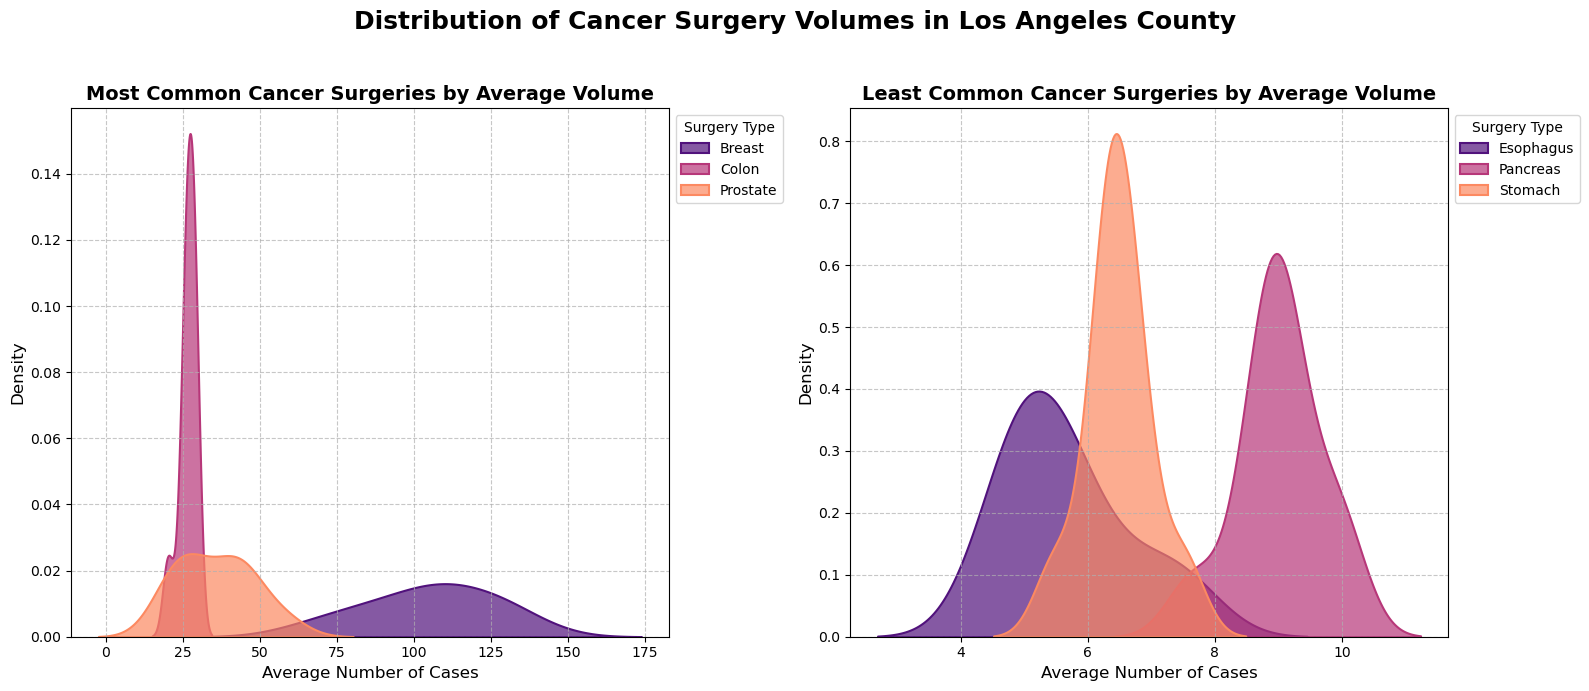

In [5]:
# Calculate the average number of cases for the most and least common surgeries, grouped by year and surgery type
most_common_avg = most_common_df.groupby(['Year', 'Surgery']).mean().reset_index()
least_common_avg = least_common_df.groupby(['Year', 'Surgery']).mean().reset_index()

# Set up a side-by-side layout for the KDE plots with seaborn
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle("Distribution of Cancer Surgery Volumes in Los Angeles County", fontsize=18, fontweight='bold')

# Define a dark color palette
palette = sns.color_palette("magma", len(most_common_avg['Surgery'].unique()))

# KDE plot for the most common surgeries
for (surgery, color) in zip(most_common_avg['Surgery'].unique(), palette):
    sns.kdeplot(data=most_common_avg[most_common_avg['Surgery'] == surgery], x='# of Cases', fill=True,
                color=color, alpha=0.7, linewidth=1.5, label=surgery, ax=axes[0])
axes[0].set_title("Most Common Cancer Surgeries by Average Volume", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Average Number of Cases", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(title="Surgery Type", loc='upper left', bbox_to_anchor=(1, 1))

# KDE plot for the least common surgeries
for (surgery, color) in zip(least_common_avg['Surgery'].unique(), palette):
    sns.kdeplot(data=least_common_avg[least_common_avg['Surgery'] == surgery], x='# of Cases', fill=True,
                color=color, alpha=0.7, linewidth=1.5, label=surgery, ax=axes[1])
axes[1].set_title("Least Common Cancer Surgeries by Average Volume", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Average Number of Cases", fontsize=12)
axes[1].set_ylabel("Density", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(title="Surgery Type", loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
#fig.savefig("dark_cancer_surgeries_volume_distribution.png", dpi=300)
plt.show()

### Plotting the Most and Least Common Cancer Surgeries by Average Volume (After Outlier Removal) 

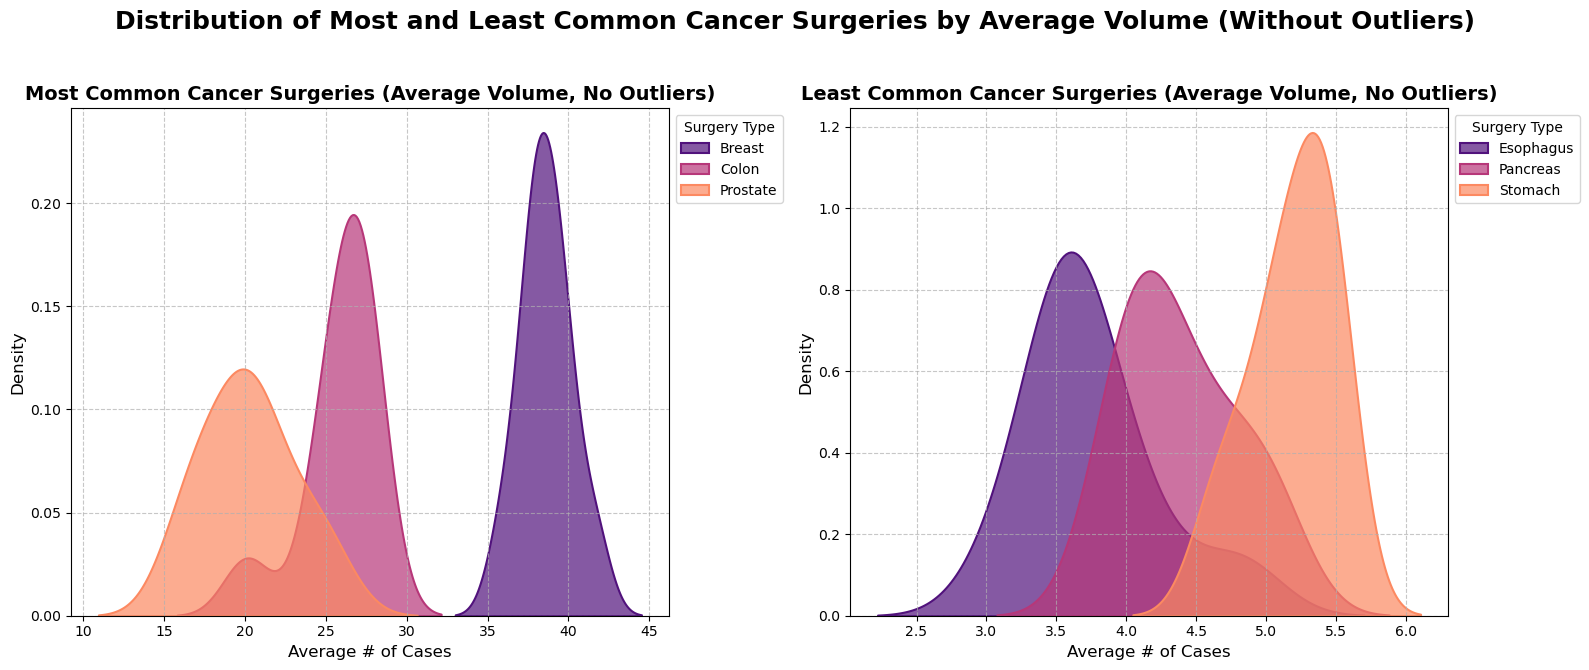

In [6]:
# Function to remove outliers based on the Interquartile Range (IQR) method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Calculate the 1st quartile
    Q3 = df[column].quantile(0.75)  # Calculate the 3rd quartile
    IQR = Q3 - Q1  # Calculate the interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers
    # Return DataFrame excluding outliers in the specified column
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal function to most and least common surgeries DataFrames
most_common_df_no_outliers = remove_outliers(most_common_df, '# of Cases')
least_common_df_no_outliers = remove_outliers(least_common_df, '# of Cases')

# Calculate the average number of cases by year and surgery type after removing outliers
most_common_avg_no_outliers = most_common_df_no_outliers.groupby(['Year', 'Surgery']).mean().reset_index()
least_common_avg_no_outliers = least_common_df_no_outliers.groupby(['Year', 'Surgery']).mean().reset_index()

# Set up the plot for side-by-side KDE plots after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle("Distribution of Most and Least Common Cancer Surgeries by Average Volume (Without Outliers)", fontsize=18, fontweight='bold')

# Define a dark color palette
palette = sns.color_palette("magma", len(most_common_avg_no_outliers['Surgery'].unique()))

# KDE plot for the most common surgeries after outlier removal
for (surgery, color) in zip(most_common_avg_no_outliers['Surgery'].unique(), palette):
    sns.kdeplot(data=most_common_avg_no_outliers[most_common_avg_no_outliers['Surgery'] == surgery], 
                x='# of Cases', fill=True, color=color, alpha=0.7, linewidth=1.5, label=surgery, ax=axes[0])
axes[0].set_title("Most Common Cancer Surgeries (Average Volume, No Outliers)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Average # of Cases", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend(title="Surgery Type", loc='upper left', bbox_to_anchor=(1, 1))

# KDE plot for the least common surgeries after outlier removal
for (surgery, color) in zip(least_common_avg_no_outliers['Surgery'].unique(), palette):
    sns.kdeplot(data=least_common_avg_no_outliers[least_common_avg_no_outliers['Surgery'] == surgery], 
                x='# of Cases', fill=True, color=color, alpha=0.7, linewidth=1.5, label=surgery, ax=axes[1])
axes[1].set_title("Least Common Cancer Surgeries (Average Volume, No Outliers)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Average # of Cases", fontsize=12)
axes[1].set_ylabel("Density", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend(title="Surgery Type", loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle
#fig.savefig("surgery_volume_no_outliers_dark.png", dpi=300)  # Save with high resolution
plt.show()

# Summary
This analysis visualizes the average volumes of the most and least common cancer surgeries in Los Angeles County using kernel density estimate (KDE) plots. By plotting the data with and without outliers, we gain a clearer view of typical case volumes across various cancer types. Breast, colon, and prostate surgeries represent the highest volumes, while surgeries for esophagus, pancreas, and stomach cancers are less common. Removing outliers refines the distribution, highlighting core trends and enabling a more focused comparison of surgery volumes across these cancer types.